<a href="https://colab.research.google.com/github/Donthula-Harika/EDA/blob/main/EDA_titanic_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA - Titanic dataset


#1.Load libraries n dataset

In [37]:
#1.load lib n dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load dataset
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#2 . Basic info & overview

In [38]:
#2 . Basic info & overview
print("shape of dataset:",df.shape)
print("info of dataset:")
print(df.info)
print("describe of dataset:")
print(df.describe)

shape of dataset: (891, 15)
info of dataset:
<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.

# 3.missing values analysis

In [39]:
# 3.missing values analysis
missing = pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/df.shape[0])*100
})

missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


# 4.Handling missing values

In [40]:
# 4.Handling missing values
#Fill the numeric missing values with the mean
df['age'] = df['age'].fillna(df['age'].mean())

#Fill categorical missing values
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])


#Drop deck column(too many missing values)
df.drop(columns=['deck'],inplace=True)

print("Missinfg valuse after handling:\n",df.isnull().sum().sum())

Missinfg valuse after handling:
 0


#Missing value analysis

In [41]:
#Missing value analysis
missing = pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/df.shape[0])*100
})

missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
survived,0,0.0
pclass,0,0.0
sex,0,0.0
age,0,0.0
sibsp,0,0.0
parch,0,0.0
fare,0,0.0
embarked,0,0.0
class,0,0.0
who,0,0.0


we filled imp columns and removed col with high missing values

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


#duplicates and data type checks

In [43]:
#duplicates and data type checks
print("Duplicated rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("Duplicated rows after removing:", df.duplicated().sum())
print()

#convert some col to category type
df['class']=df['class'].astype('category')
df['embark_town']=df['embark_town'].astype('category')
df['sex']=df['sex'].astype('category')

df.info()

Duplicated rows: 111
Duplicated rows after removing: 0

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     780 non-null    int64   
 1   pclass       780 non-null    int64   
 2   sex          780 non-null    category
 3   age          780 non-null    float64 
 4   sibsp        780 non-null    int64   
 5   parch        780 non-null    int64   
 6   fare         780 non-null    float64 
 7   embarked     780 non-null    object  
 8   class        780 non-null    category
 9   who          780 non-null    object  
 10  adult_male   780 non-null    bool    
 11  embark_town  780 non-null    category
 12  alive        780 non-null    object  
 13  alone        780 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 65.1+ KB


#Univariate analysis

         survived      pclass         age       sibsp       parch        fare
count  780.000000  780.000000  780.000000  780.000000  780.000000  780.000000
mean     0.412821    2.246154   29.797600    0.525641    0.417949   34.829108
std      0.492657    0.854452   13.708883    0.988046    0.838536   52.263440
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   21.750000    0.000000    0.000000    8.050000
50%      0.000000    3.000000   29.699118    0.000000    0.000000   15.950000
75%      1.000000    3.000000   36.000000    1.000000    1.000000   34.375000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


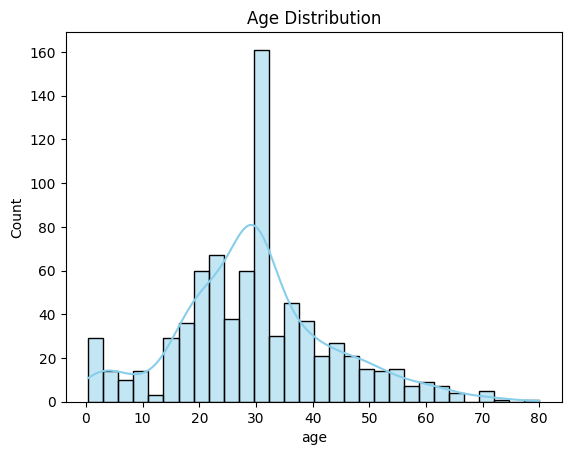

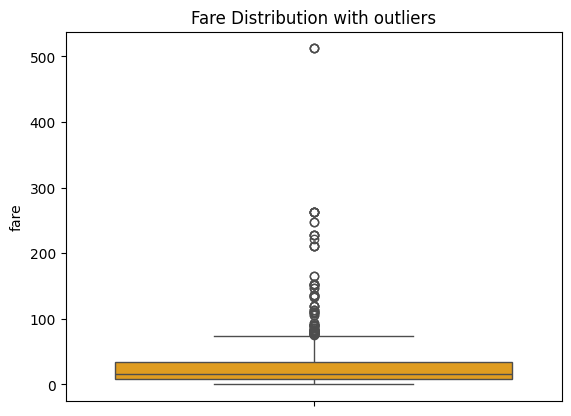

In [44]:
#Univariate analysis

num_cols=df.select_dtypes(include=['float64','int64']).columns
print(df[num_cols].describe())

#Histogram:Age
plt.title('Age Distribution')
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.show()

#Boxplot :Fare
sns.boxplot(df['fare'],color='orange')
plt.title('Fare Distribution with outliers')
plt.show()

# Univariate Analysis- categorical features

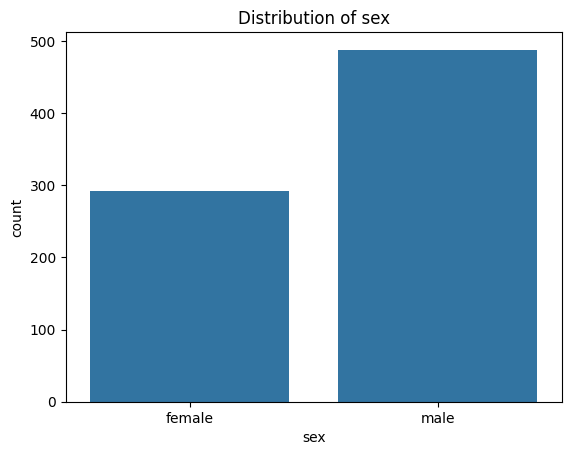

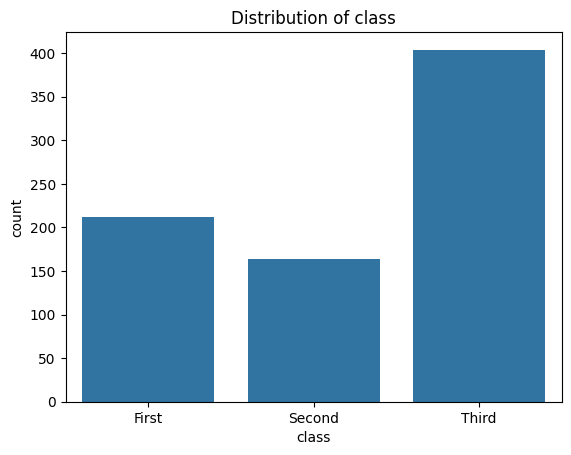

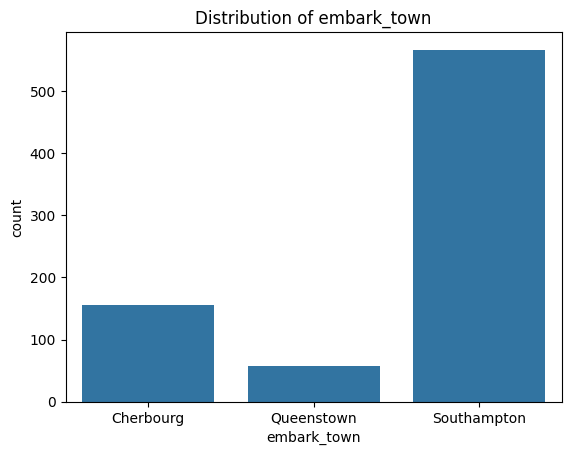

In [45]:
# Univariate Analysis- categorical features

cat_class = df.select_dtypes('category').columns

for col in cat_class:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

#Bivariate Analysis  - Numerical vs Categorical

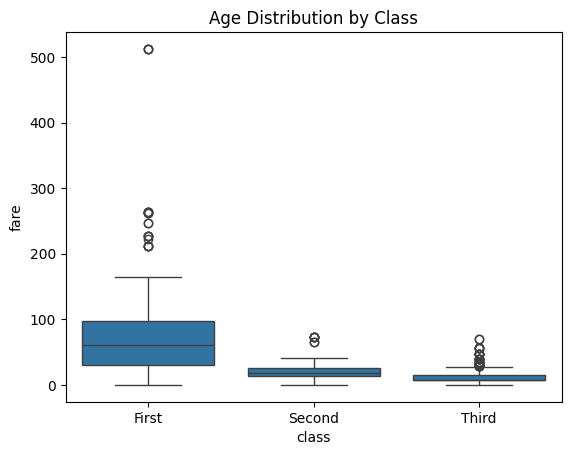

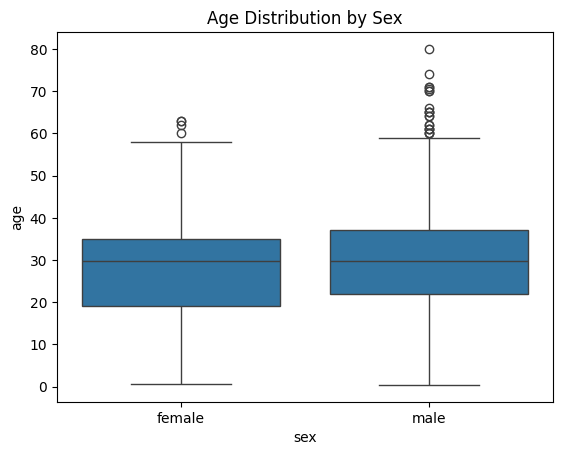

In [46]:
#Bivariate Analysis  - Numerical vs Categorical

sns.boxplot(x='class',y='fare',data=df)
plt.title('Age Distribution by Class')
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title('Age Distribution by Sex')
plt.show()


#Bivariate Analysis  - Categorical vs Categorical

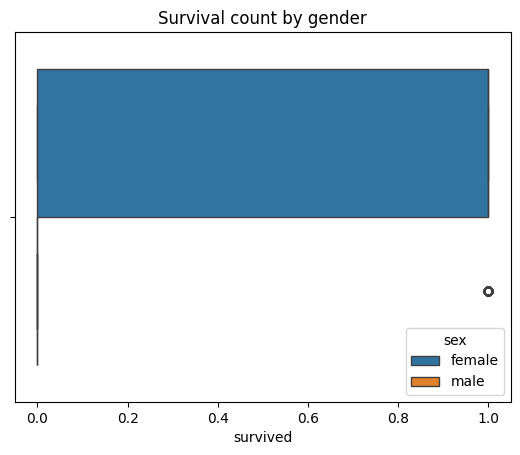

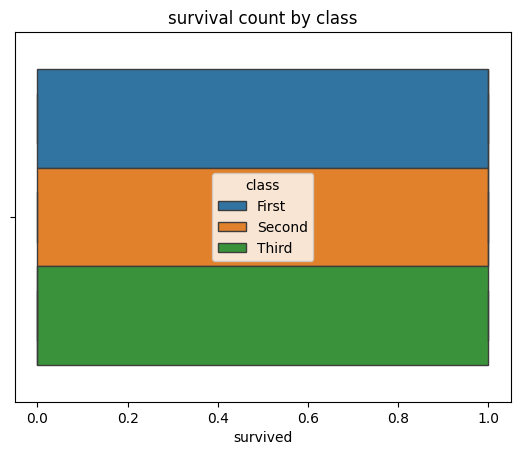

In [47]:
#Bivariate Analysis  - Categorical vs Categorical

sns.boxplot(x='survived',hue='sex',data=df)
plt.title('Survival count by gender')
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title('survival count by class')
plt.show()


#corelation and multivariate analysis

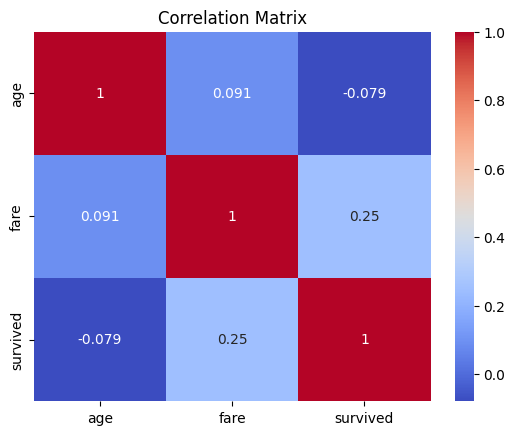

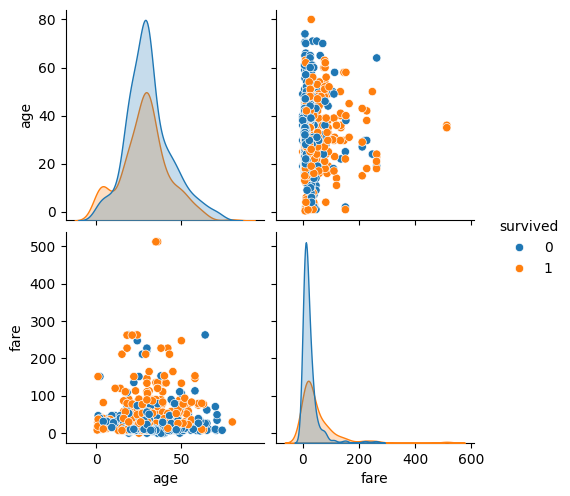

In [48]:
#corelation and multivariate analysis

corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

#Outlier detection using IQR

number of outliers in fare: 97

Outliers in 'fare' column:
    survived  pclass     sex        age  sibsp  parch      fare embarked  \
27         0       1    male  19.000000      3      2  263.0000        S   
31         1       1  female  29.699118      1      0  146.5208        C   
34         0       1    male  28.000000      1      0   82.1708        C   
52         1       1  female  49.000000      1      0   76.7292        C   
61         1       1  female  38.000000      0      0   80.0000        S   

    class    who  adult_male  embark_town alive  alone  
27  First    man        True  Southampton    no  False  
31  First  woman       False    Cherbourg   yes  False  
34  First    man        True    Cherbourg    no  False  
52  First  woman       False    Cherbourg   yes  False  
61  First  woman       False  Southampton   yes   True  



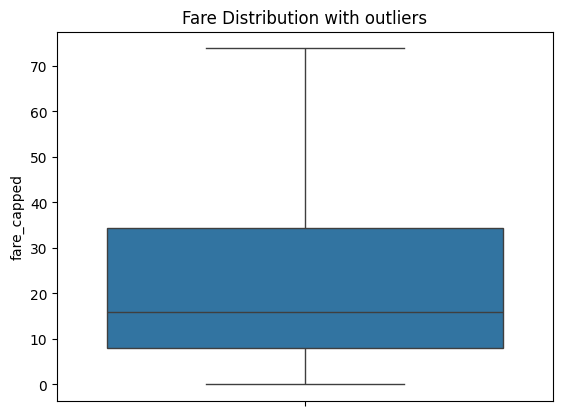

In [49]:
#Outlier detection using IQR

Q1 =df['fare'].quantile(0.25)
Q3  =df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]

print("number of outliers in fare:", len(outliers))
print()

print("Outliers in 'fare' column:")
print(outliers.head())
print()

#outliers
df['fare_capped'] = df['fare'].clip(lower_bound, upper_bound)
sns.boxplot(df['fare_capped'])
plt.title('Fare Distribution with outliers')
plt.show()
